Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Load the dataset

In [3]:
df = pd.read_csv('Dataset 105.csv')
df.head()  # Display the first few rows


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Male,0,Yes,No,1,Yes,No,DSL,Yes,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,21,250,Yes
1,2,Female,1,No,Yes,2,No,Yes,Fiber optic,No,...,No,Yes,Yes,No,One year,No,Mailed check,22,300,No
2,3,Male,0,Yes,No,3,Yes,No,No,Yes,...,Yes,No,No,Yes,Two year,Yes,Bank transfer (automatic),23,350,Yes
3,4,Female,1,No,Yes,4,No,Yes,DSL,No,...,No,Yes,Yes,No,Month-to-month,No,Credit card (automatic),24,400,No
4,5,Male,0,Yes,No,5,Yes,No,Fiber optic,Yes,...,Yes,No,No,Yes,One year,Yes,Electronic check,25,450,Yes


Data cleaning: Check for missing values, duplicates, and clean the data

In [5]:
df.isnull().sum()  # Check for missing values
df.drop_duplicates(inplace=True)  # Remove duplicates


Using visualizations and descriptive statistics to understand the data

,CustomerID,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.500000,29.620000,53.700000,2725.000000
std,29.011492,0.502519,20.551871,23.948809,1450.574599
min,1.000000,0.000000,0.000000,20.000000,250.000000
25%,25.750000,0.000000,12.750000,32.750000,1487.500000
50%,50.500000,0.500000,25.000000,49.500000,2725.000000
75%,75.250000,1.000000,46.250000,74.250000,3962.500000
max,100.000000,1.000000,71.000000,99.000000,5200.000000


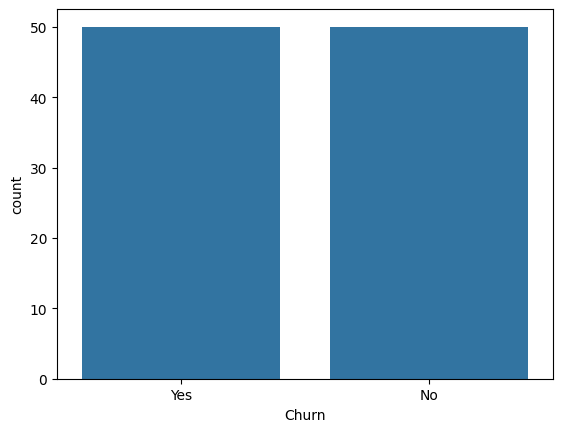

In [6]:
sns.countplot(x='Churn', data=df)  # Visualize churn distribution
df.describe()  # Summary statistics


Exploring relationships between features and churn

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

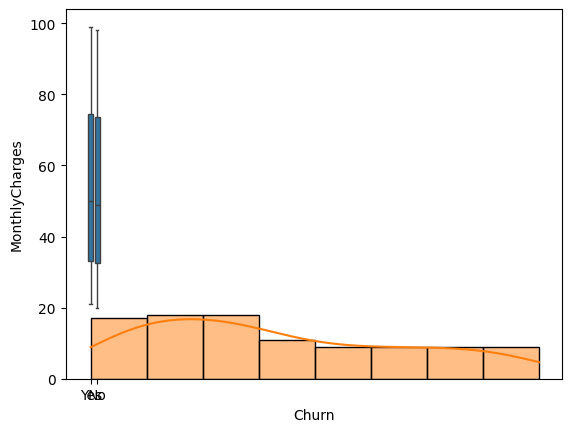

In [7]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
sns.histplot(df['Tenure'], kde=True)


Hypothesis Testing

In [8]:
# Example: T-test to compare means between churned and non-churned customers
from scipy.stats import ttest_ind
churned = df[df['Churn'] == 'Yes']['MonthlyCharges']
not_churned = df[df['Churn'] == 'No']['MonthlyCharges']
t_stat, p_val = ttest_ind(churned, not_churned)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 0.12464279971425876, P-value: 0.9010616579147837


Splitting your data into training and testing sets

In [9]:
X = df.drop('Churn', axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training a Logistic Regression model

In [11]:
# Convert categorical variables into dummy/indicator variables (one-hot encoding)
X = pd.get_dummies(df.drop('Churn', axis=1))

# Convert the target variable 'Churn' into binary format
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions)}")



[[ 8  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Accuracy: 1.0


[[ 8  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Accuracy: 1.0
